<h1 align=center style="line-height:150%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#00cc">
عرشیا ربیعی سوال اول مینی پروژه سوم 
</font>
</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا داده های برنامه آموزشی برنامه را میخوانیم
    </font>
</p>

In [2]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با بررسی داده ها و معانی آنها و نگاهی به ستون ها متوجه میشویم که ستون 
<code>PassengerId</code>
تنها ترتیب را نشان میدهد و در روند یادگیری کمکی نمیکند و همچنین ستون های 
<code>Ticket</code>
به طور تصادفی تولید شده است
و 
<code>Name</code>
محتوای مفیدی برای یادگیری را در اختیارمان قرار نمیدهد بنابراین میتوانیم این ستون ها را حذف کنیم
    </font>
</p>

In [4]:
df_valuable_features = df.drop(columns=['PassengerId' , 'Name' , 'Ticket'])
df_valuable_features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا میبینیم که مقادیر ستون
    <code>Cabin</code>
   به نسبت کل دیتاست بسیار کم است بنابراین این ستون را نیز حذف میکنیم
    <br>
  ستون 
    <code>Age</code>
    اطلاعات آن ناقص است اما میتواند اطلاعات ارزشمندی در اختیار ما قرار دهد بنابراین بجای آنکه آن را حذف کنیم مقادیر خالی آن را با میانگین ستون جایگزین میکنیم
    </br>
    </font>
</p>

In [5]:
df_valuable_features.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
mean_age = df_valuable_features['Age'].mean()
mean_age

29.69911764705882

In [7]:
df_valuable_features.drop(columns=['Cabin'] , inplace=True)

In [8]:
mean_age = df_valuable_features['Age'].mean()
df_valuable_features['Age'] = df_valuable_features['Age'].fillna(mean_age)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون 
<code>Embarked</code>
نیز 2 مقدار خالی دارد که با نگاهی به مقادیر مختلف آن و اینکه یک نوع از آن به طور جشم گیری بیشتر تکرار شده، مد این ستون را به جای ستون خالی میگذاریم
    </font>
</p>

In [9]:
df_valuable_features['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
embarked_mode = df_valuable_features['Embarked'].mode().iloc[0]
df_valuable_features['Embarked'] = df_valuable_features['Embarked'].fillna(embarked_mode)

In [11]:
df_valuable_features.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_valuable_features

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برخی از ستون های دارای مقادیر کتگوریکال هستند که برای اینکه با آنها کار کنیم میتوان به صورت 
    <code>One-hot-encoding</code>
    این کار را انجام بدهیم
    یعنی به ازای هر ستون کتگوریکال ، به تعداد مقادیر مختلف ان ستون بسازیم و به ازای یکی از این ستون ها 1 و بقیه 0 میباشند
    <br>
    برای اینکار از متد اماده پانداز به نام
    <code>get_dummies</code>
    استفاده میکنیم
    </br>
    </font>
</p>

In [13]:
df_one_hot_encoded = pd.get_dummies(df_valuable_features , columns=['Sex' , 'Embarked'])
df_one_hot_encoded.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال مقادیر را با میانگین و انحراف معیارشان استاندارد میکنیم
    سپس 
    <code>bias</code>
    را به دیتاست اضافه میکنیم
    <br>
    ناگفته نماند که ستون های 
    <code>one-hot-encoded</code>
    میتوانستند استاندارد نشوند اما من تصمیم گرفتم که این کار را بکنم.
    </br>
    </font>
</p>

In [14]:
df_one_hot_encoded_standard = pd.DataFrame()
df_one_hot_encoded_standard[df_one_hot_encoded.columns[1:]] = df_one_hot_encoded[df_one_hot_encoded.columns[1:]].apply(lambda col : (col - col.mean() ) / col.std())
df_one_hot_encoded_standard['bias'] = 1
df_one_hot_encoded_standard.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,bias
0,0.826913,-0.592148,0.432550,-0.473408,-0.502163,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
1,-1.565228,0.638430,0.432550,-0.473408,0.786404,1.354813,-1.354813,2.073341,-0.307390,-1.622891,1
2,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1
3,-1.565228,0.407697,0.432550,-0.473408,0.420494,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1
4,0.826913,0.407697,-0.474279,-0.473408,-0.486064,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
5,0.826913,0.000000,-0.474279,-0.473408,-0.477848,-0.737281,0.737281,-0.481772,3.249548,-1.622891,1
6,-1.565228,1.869009,-0.474279,-0.473408,0.395591,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
7,0.826913,-2.130371,2.246209,0.767199,-0.223957,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
8,0.826913,-0.207592,-0.474279,2.007806,-0.424018,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1
9,-0.369158,-1.207437,0.432550,-0.473408,-0.042931,1.354813,-1.354813,2.073341,-0.307390,-1.622891,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به جایی نزدیک میشویم که فقط ماتریس ها با ما صحبت میکنند نه نام ستون ها.
<br>
در اینجا ماتریس نامپای داده های اموزش و خروجی هر یک از آنها را استخراج میکنیم
</br>
    </font>
</p>

In [15]:
X_train = df_one_hot_encoded_standard[df_one_hot_encoded_standard.columns]
target = df_one_hot_encoded['Survived']
X_train.shape

(891, 11)

In [16]:
ALPHA = 0.1
LAMDA = 0

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این کلاس ، کلاس پیاده سازی مدل
<code>Logistic Regression</code>
    میباشد که در آن متد 
    <code>cross validation</code>
    هم پیاده سازی شده که به ازای نرخ یادگیری و ضریب منظم سازی های متعدد مدل را بررسی کنیم که 
    <code>Overfit</code>
    یا
    <code>underfit</code>
    نشده باشد.
    <br>
    <code>cost function</code>
    این مدل 
    <code>binary cross entropy</code>
    میباشد که در یک متد پیاده سازی شده.
    </br>
    در این پیاده سازی سعی شده تا جایی که میشود از حلقه های
    <code>for</code>
    استفاده نشود و از خاصیت 
    <code>broadcasting</code>
    نامپای استفاده کنیم تا در زمان همین صرفه جویی شود.
    </font>
</p>

In [17]:
class LogisticRegression:
    def __init__(self , x , y ):
        self.X_train = x.copy()
        self.y_train = y.copy()
        self.weights = np.random.normal(0 , 1 ,x.shape[1])
    def sigmoid(self , z):
        return 1/(1+np.exp(-z))
    def cost_function(self, X , y , w):
        z = np.dot(X , w)
        h = self.sigmoid(z)
        cost = ((-y* np.log(h)) - (1-y)*np.log(1-h)).mean()
        cost += ((w)**2).mean() * LAMDA / 2
        return cost
    def cross_validation(self):
        shuffled = np.arange(self.X_train.shape[0])
        costs_train = []
        costs_val = []
        for i in range(10):
            np.random.shuffle(shuffled)
            self.X_train = self.X_train.loc[shuffled]
            self.y_train = self.y_train[shuffled]
            for fold in range(5):
                mask = np.ones(self.X_train.shape[0] , dtype = bool)
                mask[self.X_train.shape[0]//5 * fold : self.X_train.shape[0]//5 * (fold+1)] = False
                X_validation = self.X_train[~mask].copy()
                y_validation = self.y_train[~mask].copy()
                X = self.X_train[mask].copy()
                y = self.y_train[mask].copy()
                w = self.fit(X , y , 400 , False)
                cost_val = self.cost_function(X_validation , y_validation , w)
                cost_train = self.cost_function(X , y , w)
                costs_train.append(cost_train)
                costs_val.append(cost_val)
        plt.boxplot([costs_val , costs_train])
        plt.xticks([1,2] , ['Validation datas' , 'Train datas'])
        plt.yscale('log')
        plt.ylabel('Binary-Cross-Entropy')
        plt.show()
        return
    def fit(self ,X , y , iters ,printCost = True):
        weights = self.weights.copy()
        for i in range(iters):
            z = np.dot(X , weights)
            h = self.sigmoid(z)
            if printCost:
                cost = self.cost_function(X , y , weights)
                print(f'in epoch {i+1} cost function is : {cost}')        
            grad = (np.dot((h - y).T , X) + (weights*LAMDA))/X.shape[0]
            weights -= (ALPHA * grad)            
        return weights
    def get_weight(self):
        return self.weights
    def set_weight(self , w):
        self.weights = w
    def predict(self , X , w):
        return [self.sigmoid(np.dot(X.loc[i] , w)) > 0.5 for i in range(X.shape[0])]

In [18]:
def accuracy(y_pred , y_real):
    return f'with parameters Learning rate = {ALPHA} and Regularization rate = {LAMDA} the Accuracy is : {(y_pred == y_real).sum() / len(predict_train) * 100}'

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از اینجا تا چند سلول بعدی سعی میکنیم که مدل های مختلف که دارای ضریب منظم سازی و نرخ یادگیری متفاوت هستند را بررسی کنیم که
<code>underfit</code>
یا 
<code>overfit</code>
اتفاق نیافتد.
<br>
از آنجا که 
<code>epoches</code>
من در متد
<code>cross validation</code>
به علت کمبود وقت 400 میباشد از مقایسه مقادیر بدست آمده به ازای مدل های مختلف نمیتوان نتیجه گرفت که کدام مدل بهتر است چرا که هر کدام بسته به پارامتر های خود بعد از یه تعداد 
<code>iteration</code>
خاص همگرا میشوند و از انجا که نرخ یادگیری در مدل ها متفاوت است و انها که کمتر هستند دیر تر همگرا میشوند بنابراین با یک تعداد 
<code>iteration</code>
ثابت و کم نمیتوان به قطعیت مقایسه چند مدل مختلف با نرخ یادگیری کم پرداخت و همچنین در این شرایط که عبارت منظم سازی وجود دارد ابتدا تابع فرضیه مقدار نسبتا بیشتری دارد اما روند کم شدن آن بیشتر است ولی باید به تعداد کافی زیاد باشد که به مقدار همگرای خود برسد بنابراین همانطور که عرض کردم صرفا میتوان به 
بررسی
<code>underfit</code>
بودن یا
<code>overfit</code>
بودن مدل پرداخت.
</br>
    </font>
</p>

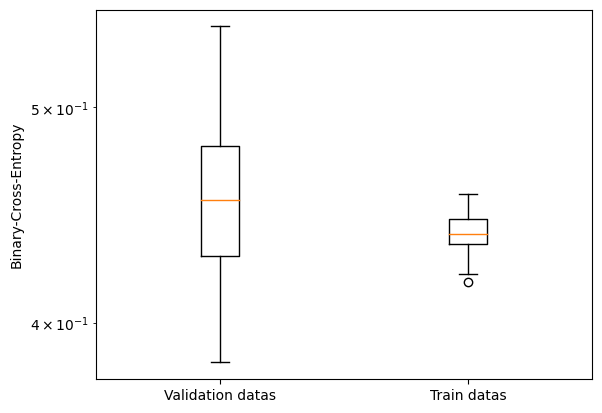

In [19]:
ALPHA = 0.1
LAMDA = 0
model = LogisticRegression(X_train , target)
model.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق نمودار بالا مقادیر تابع فرضیه در دو حالت داده ی آموزش و تست به اندازه کافی کم میباشد که بگوییم 
<code>underfit</code>
اتفاق نیافتاده است.
همچنین فاصله میان میانگین تابع فرضیه بین داده های اموزشی و آزمون کم میباشد بنابراین مدل 
<code>overfit</code>
نمیباشد و مدل 
<code>generalized</code>
شده است.
    </font>
</p>

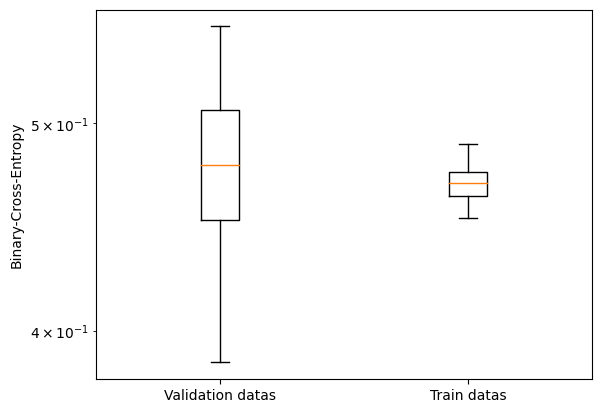

In [20]:
ALPHA = 0.1
LAMDA = 0.2
model.cross_validation()

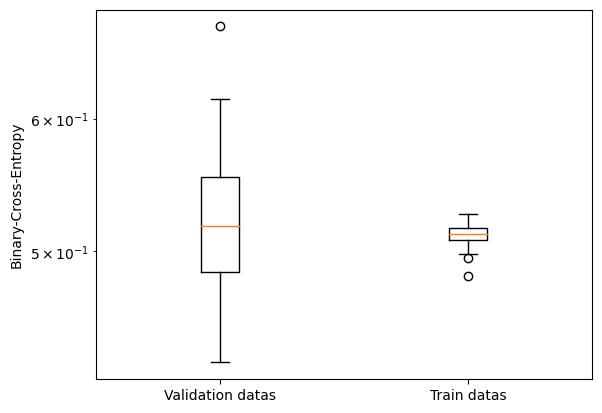

In [21]:
ALPHA = 0.1
LAMDA = 0.5
model.cross_validation()

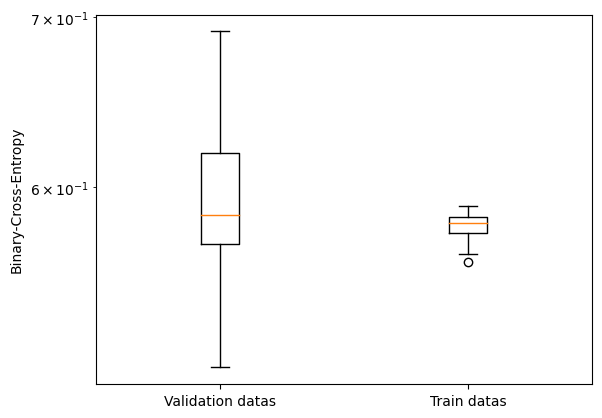

In [22]:
ALPHA = 0.1
LAMDA = 1
model.cross_validation()

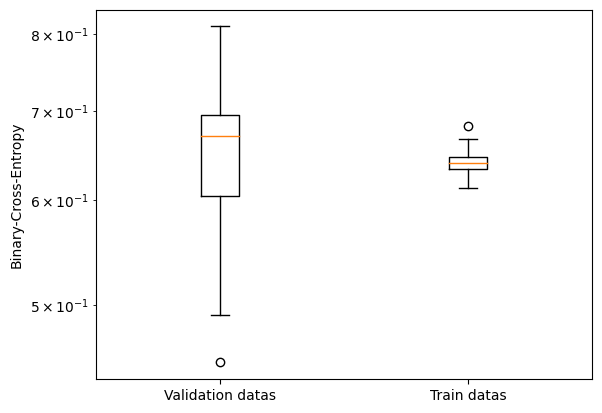

In [23]:
ALPHA = 0.01
LAMDA = 0
model.cross_validation()

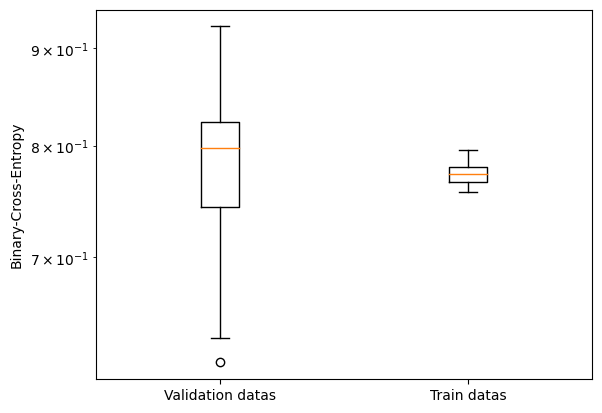

In [24]:
ALPHA = 0.01
LAMDA = 0.5
model.cross_validation()

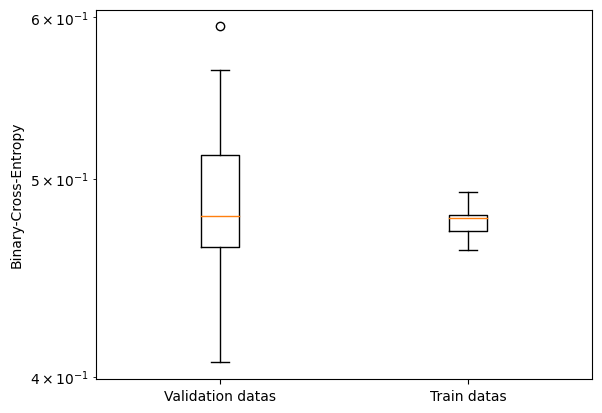

In [25]:
ALPHA = 0.05
LAMDA = 0.2
model.cross_validation()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار های بقیه مدل ها نیز تحلیل مشابه اولی دارند نه چیزی بیشتر نه چیزی کمتر.
<br>
حال باید یک مدل انتخاب کنیم تا 
<code>train</code>
نهایی را روی آن انجام دهیم و با استفاده از وزن های بدست امده داده های 
<code>test</code>
را پیشبینی کنیم
که من
<code>Alpha = 0.05 , Lambda = 0.2</code>
    را در نظر گرفته ام
حال با این پارامتر ها داده های را تا 5000
    <code>epoches</code>
    اموزش میدهیم تا احتمالا مقدار
    <code>cost funtion</code>
    همگرا شود.
    
</br>
    </font>
</p>

In [26]:
ALPHA = 0.05
LAMDA = 0.2
w = model.fit(X_train , target,5000)

in epoch 1 cost function is : 1.1508352629596728
in epoch 2 cost function is : 1.1400116250216816
in epoch 3 cost function is : 1.1293761321205458
in epoch 4 cost function is : 1.1189267125534472
in epoch 5 cost function is : 1.1086612707111352
in epoch 6 cost function is : 1.0985776862844654
in epoch 7 cost function is : 1.088673813619284
in epoch 8 cost function is : 1.0789474812495976
in epoch 9 cost function is : 1.069396491634626
in epoch 10 cost function is : 1.0600186211206242
in epoch 11 cost function is : 1.0508116201432651
in epoch 12 cost function is : 1.0417732136809494
in epoch 13 cost function is : 1.0329011019641132
in epoch 14 cost function is : 1.0241929614401215
in epoch 15 cost function is : 1.0156464459883219
in epoch 16 cost function is : 1.0072591883749193
in epoch 17 cost function is : 0.9990288019331028
in epoch 18 cost function is : 0.9909528824499763
in epoch 19 cost function is : 0.983029010238666
in epoch 20 cost function is : 0.9752547523716455
in epoch 21 

In [28]:
predict_train = model.predict(X_train , w)
print(accuracy(predict_train , target))

with parameters Learning rate = 0.05 and Regularization rate = 0.2 the Accuracy is : 80.02244668911335


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال داده های تست را میخوانیم و باید حواسمان داده ها را باید دقیقا به فرمت داده های آموزش در بیاوریم چون وزن ها با آن فرمت آموزش دیده اند
    </font>
</p>

In [30]:
df_test = pd.read_csv('Dataset/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_test.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [32]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از انجا که در داده های تست هم مقادیر خالی برای ستون سن داریم آن را با میانگین پر میکنیم که البته باید توجه کرد که با میانگین ستون سن داده های آموزش باید پر کرد نه داده های تست.
    </font>
</p>

In [33]:
df_test['Age'] = df_test['Age'].fillna(mean_age)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [36]:
df_test_encoded = pd.get_dummies(df_test , columns=['Sex' , 'Embarked'])
df_test_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,1,0,1,0
1,3,47.000000,1,0,7.0000,1,0,0,0,1
2,2,62.000000,0,0,9.6875,0,1,0,1,0
3,3,27.000000,0,0,8.6625,0,1,0,0,1
4,3,22.000000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,0,1,0,0,1
414,1,39.000000,0,0,108.9000,1,0,1,0,0
415,3,38.500000,0,0,7.2500,0,1,0,0,1
416,3,29.699118,0,0,8.0500,0,1,0,0,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آنجا که داده های تست را نیز هم باید استاندارد سازی کرد تابع زیر را پیاده سازی کردم که باید توجه کرد که استاندارد سازی باید بر اساس میانگین و انحراف معیار ستون های داده های آموزش باشد نه تست
    </font>
</p>

In [37]:
def standardize_test(df , df_test):
    df_test_standard = pd.DataFrame()
    for col in range(len(df.columns)):
        col_mean = df[df.columns[col]].mean()
        col_std = df[df.columns[col]].std()
        df_test_standard[df_test.columns[col]] = ((df_test[df_test.columns[col]] - col_mean) / col_std).copy()
    return df_test_standard

In [38]:
df_test_standard = standardize_test(df_one_hot_encoded[df_one_hot_encoded.columns[1:]], df_test_encoded)
df_test_standard['bias'] = 1
df_test_standard

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,bias
0,0.826913,0.369241,-0.474279,-0.473408,-0.490508,-0.737281,0.737281,-0.481772,3.249548,-1.622891,1
1,0.826913,1.330631,0.432550,-0.473408,-0.507194,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1
2,-0.369158,2.484298,-0.474279,-0.473408,-0.453112,-0.737281,0.737281,-0.481772,3.249548,-1.622891,1
3,0.826913,-0.207592,-0.474279,-0.473408,-0.473739,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
4,0.826913,-0.592148,0.432550,0.767199,-0.400792,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0.826913,0.000000,-0.474279,-0.473408,-0.486064,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
414,-1.565228,0.715342,-0.474279,-0.473408,1.543379,1.354813,-1.354813,2.073341,-0.307390,-1.622891,1
415,0.826913,0.676886,-0.474279,-0.473408,-0.502163,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1
416,0.826913,0.000000,-0.474279,-0.473408,-0.486064,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال داده های تست را با استفاده از وزن های ترین شده 
<code>predict</code>
میکنیم
و در نهایت در ستون 
<code>Survived</code>
در داده های تست قرار میدهیم.
    </font>
</p>

In [39]:
predict_test = model.predict(df_test_standard , w)
predict_test = np.array(list(map( lambda x : 0 if x == False else 1 , predict_test)))
predict_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
df_test_standard['Survived'] = predict_test
df_test_standard.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,bias,Survived
0,0.826913,0.369241,-0.474279,-0.473408,-0.490508,-0.737281,0.737281,-0.481772,3.249548,-1.622891,1,0
1,0.826913,1.330631,0.432550,-0.473408,-0.507194,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1,0
2,-0.369158,2.484298,-0.474279,-0.473408,-0.453112,-0.737281,0.737281,-0.481772,3.249548,-1.622891,1,0
3,0.826913,-0.207592,-0.474279,-0.473408,-0.473739,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1,0
4,0.826913,-0.592148,0.432550,0.767199,-0.400792,1.354813,-1.354813,-0.481772,-0.307390,0.615493,1,1
5,0.826913,-1.207437,-0.474279,-0.473408,-0.462419,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1,0
6,0.826913,0.023141,-0.474279,-0.473408,-0.494532,1.354813,-1.354813,-0.481772,3.249548,-1.622891,1,1
7,-0.369158,-0.284503,0.432550,0.767199,-0.064480,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1,0
8,0.826913,-0.899793,-0.474279,-0.473408,-0.502582,1.354813,-1.354813,2.073341,-0.307390,-1.622891,1,1
9,0.826913,-0.669059,1.339380,-0.473408,-0.162078,-0.737281,0.737281,-0.481772,-0.307390,0.615493,1,0
